<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/Evaluaciones/Primer-Interciclo/Prueba_Unidad_2_JB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio en clases:**
Calcular, graficar y obtener el valor de Chi Cuadrado para los siguientes generadores con las siguientes semillas:

- Cuadrados medios: Xo=74731897457, D=7
- Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19
- Random de Python semilla (01032022)
- Tauswoth q=15, r=7, l=7

In [1]:
# Importanmos las librerias
import random
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Defino una funcion para generar los 100 numeros pseudoaletaroios, 
#en este caso estoy utilizando la libreria de Python random
def random_python(semilla="01032022",N=100):
  numeros = []
  random.seed(semilla)
  [numeros.append(random.random())for i in range(N)]
  return numeros

In [3]:
def cuadrados_medios(semilla=74731897457, num_digitos=7, N=100):
  numeros = []
  xo = semilla
  digitos = num_digitos
  iteraciones = N
  xn = xo
  for i in range(iteraciones):
    xnn = xn**2
    txnn = str(xnn).zfill(8)
    tam = len(txnn)
    ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
    rn = ui / (int('9'*digitos)+1)
    numeros.append(rn)
    xn = ui
  return numeros 

In [4]:
def congruencia_lineal(semilla=7, valor_a=74731897457, valor_b=37747318974, valor_m=19, N=100): 
  xo = semilla
  a = valor_a
  b = valor_b
  m = valor_m
  iteraciones = N
  numeros = []
  xn = xo
  for i in range(iteraciones):
    xnn = (a*xn+b) % m
    ui = xnn/m
    numeros.append(ui)
    xn = xnn
  return numeros

In [5]:
def generador_tauswoth(r=7, q=15, l=7, N=100):

  valor_r = r
  valor_q = q

  if (0 < valor_r) and (valor_r < valor_q) :
    condicion = True
  else:
    print("\n Condicion: r y q deben cumplir 0 < r < q. \n")  
    return

  valor_nm = N*l
  listaNumerosBinarios = []

  ##Creacion de valores binarios con formula bi = (bi-r + bi-q) mod 2
  for i in range(0,valor_nm):
    if(i<valor_q):
      listaNumerosBinarios.append(1)
    else: 
      listaNumerosBinarios.append((listaNumerosBinarios[i-valor_r]+listaNumerosBinarios[i-valor_q]) % 2)

  ##Agrupar para conversion 
  valor_l = l
  valor_agrupaciones = int(valor_nm/valor_l)
  posicion = 0 
  aux = valor_l
  cont = 0
  listaValoresNumericos = []

  for j in range(0,valor_agrupaciones):
    sublista =listaNumerosBinarios[cont:aux] 
    binario_To_Decimal = 0
    cont2 = 0
    for k in range(len(sublista)-1,-1,-1):
      if(sublista[cont2]==1): 
        binario_To_Decimal = 2**(k) + binario_To_Decimal
      cont2 = cont2 + 1
    listaValoresNumericos.append(binario_To_Decimal / (2**valor_l))
    cont = cont + valor_l
    aux = aux + valor_l
    
  return listaValoresNumericos

In [80]:
import math

def pruebasdeCorridas(listaNumeros):

  ##Creacion de valores 0 - 1 
  valoresCeroUnoArreglo = []
  for i in listaNumeros:
    if(i>=0.5):
      valoresCeroUnoArreglo.append(1)
    else:
      valoresCeroUnoArreglo.append(0)
  #print(valoresCeroUnoArreglo)
  #print(valoresCeroUnoArreglo.count(0))
  #print(valoresCeroUnoArreglo.count(1))
  ###Contar cuentos cambios de valores existen 
  aux = 0
  cont = 0
  contadorDiferencia = 0
  for i in valoresCeroUnoArreglo:
    if (cont == 0):
      contadorDiferencia = contadorDiferencia + 1
      aux = i
      cont = 1
    else: 
      if(aux != i):
        contadorDiferencia = contadorDiferencia + 1
        aux = i
    #print("i: ",i, " aux: ",aux, " contador: ",contadorDiferencia)
  cantidadNumero = valoresCeroUnoArreglo.count(0)+valoresCeroUnoArreglo.count(1)
  return int(contadorDiferencia), int(valoresCeroUnoArreglo.count(0)), int(valoresCeroUnoArreglo.count(1)), int(cantidadNumero)

In [48]:
def graficoPieCerosUnos(valoresCero, valoresUno):
  etiquetas = ['Valores de Cero', 'Valores de Uno']
  colores = ['#abcdef', '#aabbcc']
  plt.pie([valoresCero, valoresUno], labels=etiquetas, colors=colores, autopct='%.2f %%')
  plt.title('Valores de Ceros y Unos')
  plt.show()

In [70]:
def calculoFormulasPruebasCorrida(listaNumeros):
  contadorDiferencia, valoresCero, valoresUno, cantidadNumero = pruebasdeCorridas(listaNumeros)
  graficoPieCerosUnos(valoresCero, valoresUno)
  valor_esperado = ((2*(valoresCero)*(valoresUno))/(cantidadNumero)) + (1/2)
  varianza = ((2*(valoresCero)*(valoresUno))*(2*(valoresCero)*(valoresUno)-(cantidadNumero)))/((pow(cantidadNumero, 2))*(cantidadNumero-1))
  estadistico = ((contadorDiferencia)- (valor_esperado))/(math.sqrt(varianza))
  print("contadorDiferencia, valoresCero, valoresUno, cantidadNumero")
  print(contadorDiferencia, valoresCero, valoresUno, cantidadNumero)
  return estadistico

In [67]:
def graficoPieCorridas(cuadradosMedios, congruenciaLineal, random, Tauswoth):
  etiquetas = ["Cuadrados Medios", "Congruencia Lineal", "Random", "Tauswoth"]
  colores = ['#abcdef', '#aabbcc', '#CDCAFA', '#FAF4D7']
  plt.bar(etiquetas, [round(cuadradosMedios,2), round(congruenciaLineal,2), round(random,2), round(Tauswoth,2)])
  plt.title('Numero de corridas generados')
  plt.show()

### Calculo de Independencia de Random Semilla

Numeros Aleatorios generados:  [0.19395794358505347, 0.8798102130595057, 0.828391755031305, 0.6960795814654994, 0.28953733267802284, 0.16210707615008113, 0.4874030549561268, 0.1013601600494044, 0.6990173393377035, 0.47240776336088275, 0.5690347574783666, 0.6681331836366342, 0.7144157095278144, 0.5908572286191758, 0.7134724716341273, 0.9164202775094519, 0.5027457994684825, 0.24342781330179908, 0.9461893391271378, 0.874756779449594, 0.49359770322386387, 0.07522660327563235, 0.825850319280524, 0.8687754781916857, 0.468719962871446, 0.32928869329528343, 0.4997031266879405, 0.06706219161454041, 0.20350932748266737, 0.08777164283061178, 0.44128508602274275, 0.92571487683696, 0.28394811723560587, 0.4865979882220858, 0.946528900117173, 0.8991210946653714, 0.08885316192405845, 0.8753595703431967, 0.4205275861840111, 0.10990947615274949, 0.9340698262550936, 0.6202272995976544, 0.6281118604393244, 0.8393192709201069, 0.3138051115072329, 0.9405601249505268, 0.5663924181896958, 0.8735835152198743, 

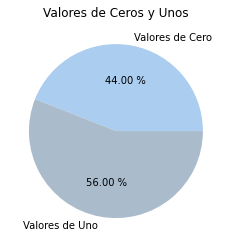

contadorDiferencia, valoresCero, valoresUno, cantidadNumero
45 44 56 100
Numeros Aleatorios generados:  [0.6009619083013497, 0.7544824379607146, 0.12043532987383554, 0.2238116361922322, 0.3554416664685648, 0.3649338752279483, 0.17405451171268804, 0.32250705110103095, 0.07365121514270778, 0.22328536228547846, 0.5657683456996286, 0.47192384810364474, 0.4202981677611177, 0.37108436054595506, 0.10650450605448003, 0.3833193199640059, 0.7049825780489426, 0.13690172112654952, 0.5716984080534419, 0.9789396569474001, 0.236780550670054, 0.006725889464470058, 0.5139046449054391, 0.6438650174292219, 0.6777000434949092, 0.18065102285418133, 0.2600319514322885, 0.9990112973850298, 0.7819230179134201, 0.6528163281009259, 0.41158028245500233, 0.3503230957715354, 0.6321520503728941, 0.24128644445389802, 0.15876526910544175, 0.06886725630014012, 0.2203104909550485, 0.0635925351918386, 0.6359586015601617, 0.5954035256577749, 0.6798685267659752, 0.24934012141223982, 0.9701534277917231, 0.5175900365934477,

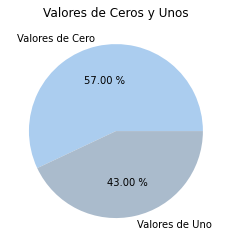

contadorDiferencia, valoresCero, valoresUno, cantidadNumero
46 57 43 100


In [88]:
import random
numerosRandomLibreary = random_python("01032022", 100)
print("Numeros Aleatorios generados: ",numerosRandomLibreary)
estadisticoRandom = calculoFormulasPruebasCorrida(numerosRandomLibreary)

numerosRandomLibreary = random_python(1032022, 100)
print("Numeros Aleatorios generados: ",numerosRandomLibreary)
estadisticoRandom = calculoFormulasPruebasCorrida(numerosRandomLibreary)


### Calculo de Uniformidad de Cuadrados Medios

Numeros Aleatorios generados:  [0.4975235, 0.529633, 0.5111146, 0.2381343, 0.0794483, 0.1203237, 0.7779278, 0.171662, 0.6784224, 0.2569528, 0.2474142, 0.1378636, 0.063722, 0.6049328, 0.9436925, 0.5555345, 0.6185806, 0.6419586, 0.1108441, 0.864145, 0.746581, 0.3831895, 0.8341929, 0.8777944, 0.5230086, 0.5379956, 0.4392656, 0.9542673, 0.6260798, 0.9759159, 0.4118438, 0.6153155, 0.6131645, 0.970704, 0.2662556, 0.9204453, 0.2195502, 0.0229032, 0.455657, 0.6233016, 0.5048845, 0.9083583, 0.1148011, 0.7929256, 0.7310071, 0.3713802, 0.9232529, 0.3959173, 0.7505084, 0.2628584, 0.9453845, 0.7518528, 0.2826328, 0.8129963, 0.9629838, 0.337799, 0.1081644, 0.9953742, 0.769798, 0.5889608, 0.8748239, 0.316856, 0.3977247, 0.1849369, 0.0165698, 0.4558272, 0.7784362, 0.9629174, 0.2099192, 0.6607052, 0.5313613, 0.3448311, 0.9084875, 0.3495376, 0.1765338, 0.6418254, 0.939844, 0.3067443, 0.9206558, 0.607102, 0.5728384, 0.1438325, 0.8778805, 0.6741722, 0.5081552, 0.2217072, 0.5408253, 0.4920051, 0.0690184, 0

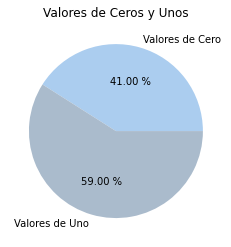

contadorDiferencia, valoresCero, valoresUno, cantidadNumero
49 41 59 100


In [82]:
numerosRandomCuadradosMedios = cuadrados_medios(74731897457, 7, 100)
print("Numeros Aleatorios generados: ",numerosRandomCuadradosMedios)
estadisticoCuadradosMedios = calculoFormulasPruebasCorrida(numerosRandomCuadradosMedios)

### Calculo de Uniformidad de Congruencia Lineal

Numeros Aleatorios generados:  [0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421

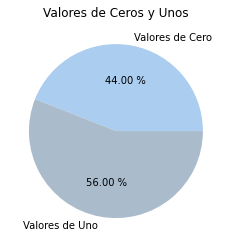

contadorDiferencia, valoresCero, valoresUno, cantidadNumero
45 44 56 100


In [83]:
numerosRandomCongruenciaLineal = congruencia_lineal(7, 74731897457, 37747318974, 19, 100)
print("Numeros Aleatorios generados: ",numerosRandomCongruenciaLineal)
estadisticoCongruencia = calculoFormulasPruebasCorrida(numerosRandomCongruenciaLineal)


### Calculo de Independencia de Generador de Tauswoth

Numeros Aleatorios generados:  [0.9921875, 0.9921875, 0.5, 0.4921875, 0.7421875, 0.5, 0.3671875, 0.6171875, 0.6875, 0.4921875, 0.6484375, 0.59375, 0.2890625, 0.5234375, 0.6328125, 0.375, 0.6875, 0.0, 0.34375, 0.34375, 0.453125, 0.34375, 0.3828125, 0.3046875, 0.4921875, 0.84375, 0.3984375, 0.5390625, 0.71875, 0.484375, 0.625, 0.6171875, 0.8046875, 0.5, 0.3984375, 0.6484375, 0.578125, 0.2734375, 0.546875, 0.6796875, 0.40625, 0.2421875, 0.5390625, 0.578125, 0.3125, 0.6015625, 0.6953125, 0.9921875, 0.1484375, 0.84375, 0.2890625, 0.6484375, 0.5078125, 0.3125, 0.5625, 0.21875, 0.4375, 0.421875, 0.328125, 0.3828125, 0.28125, 0.46875, 0.859375, 0.875, 0.5546875, 0.9921875, 0.71875, 0.2734375, 0.6015625, 0.71875, 0.453125, 0.65625, 0.5703125, 0.7734375, 0.5546875, 0.421875, 0.6640625, 0.109375, 0.28125, 0.7734375, 0.8828125, 0.5, 0.4375, 0.6875, 0.53125, 0.8125, 0.578125, 0.984375, 0.7109375, 0.78125, 0.5703125, 0.4609375, 0.2421875, 0.515625, 0.1015625, 0.84375, 0.828125, 0.21875, 0.3203125, 0

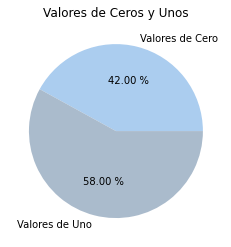

contadorDiferencia, valoresCero, valoresUno, cantidadNumero
48 42 58 100


In [84]:
numerosRandomtauswoth = generador_tauswoth(7, 15, 7, 100)
print("Numeros Aleatorios generados: ",numerosRandomtauswoth)
estadisticotauswoth = calculoFormulasPruebasCorrida(numerosRandomtauswoth)

## Grafica de resultados de cada uno de los metodos

estadisticoCuadradosMedios, estadisticoCongruencia, estadisticoRandom, estadisticotauswoth
0.02493838832056819 -0.9750491625213825 -0.9750491625213825 -0.25175237171777376


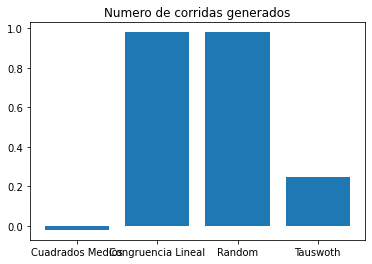

In [85]:
print("estadisticoCuadradosMedios, estadisticoCongruencia, estadisticoRandom, estadisticotauswoth")
print(estadisticoCuadradosMedios, estadisticoCongruencia, estadisticoRandom, estadisticotauswoth)

graficoPieCorridas((-1)*estadisticoCuadradosMedios, (-1)*estadisticoCongruencia, (-1)*estadisticoRandom, (-1)*estadisticotauswoth)

### Conclusiones 

**Comprobaciòn**: 
$$ -1.96 < Zo < 1.96 $$

Cuadrados Medios: $$ -1.96 < -0.18 < 1.96 $$
Cuadrados Congruencia: $$ -1.96 < -1.17 < 1.96 $$
Cuadrados Random: $$ -1.96 < -1.17 < 1.96 $$
Cuadrados tauswoth: $$ -1.96 < -0.45 < 1.96 $$

